In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('train.csv')

In [4]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

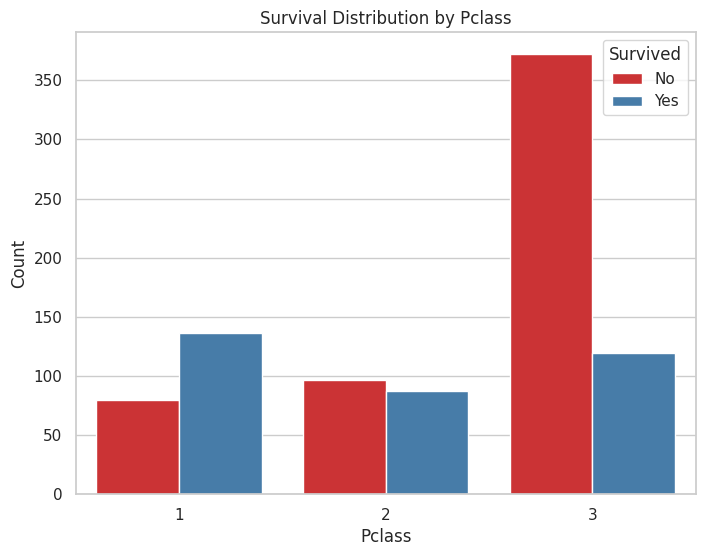

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# 클래스별 생존 여부 분포를 시각화
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

# 'Pclass' 열을 기준으로 생존 여부를 나누어 카운트 플롯 그리기
sns.countplot(data=df, x='Pclass', hue='Survived', palette='Set1')

# 그래프에 제목과 레이블 추가
plt.title('Survival Distribution by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Count')

# 범례 추가
plt.legend(title='Survived', loc='upper right', labels=['No', 'Yes'])

# 그래프 표시
plt.show()


<ipython-input-9-53a34882a301>:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


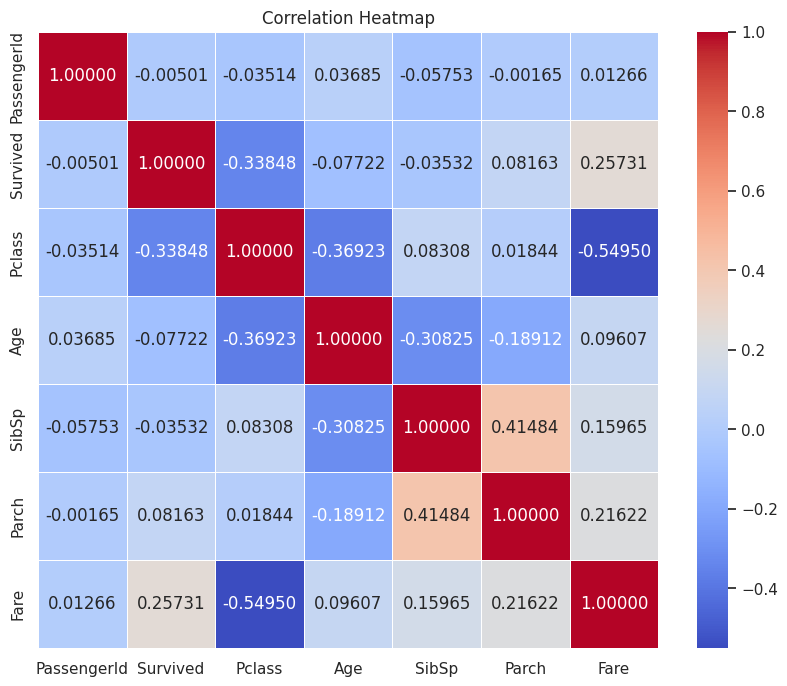

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터 불러오기
df = pd.read_csv('train.csv')

# 상관 계수 계산
correlation = df.corr()

# 상관 행렬 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".5f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()


In [15]:
from sklearn.preprocessing import MinMaxScaler

# min-max 정규화 객체 생성
scaler = MinMaxScaler()

# min-max 정규화 적용
scaler.fit(df[['Fare']])
df_scaled = scaler.transform(df[['Fare']])

df['Fare']=df_scaled


In [16]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,0.014151,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,0.139136,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,0.015469,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,0.103644,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,0.015713,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,0.025374,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,0.058556,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,0.045771,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,0.058556,C148,C


In [19]:
target=df['Survived']

In [20]:
train_data=df.drop('Survived',axis=1)
train_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,0.014151,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,0.139136,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,0.015469,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,0.103644,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,0.015713,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,0.025374,NaN,S
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,0.058556,B42,S
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,0.045771,NaN,S
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,0.058556,C148,C


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [39]:
result=[]
for i in train_data['Name']:

  result.append(i.split(',')[1].split('.')[0].strip())

new_data=[]
for data in result:
  if data =='Mr':
    new_data.append(0)
  elif data=='Miss':
    new_data.append(1)
  elif data=='Mrs':
    new_data.append(2)
  else:
    new_data.append(3)


train_data['Name']=new_data


In [42]:
new_sex_data=[]
for sex in train_data['Sex']:
  if sex =='male':
    new_sex_data.append(0)
  else:
    new_sex_data.append(1)
train_data['Sex']=new_sex_data


In [44]:
train_data=train_data.drop('Ticket',axis=1)
train_data=train_data.drop('Cabin',axis=1)
train_data=train_data.drop('Embarked',axis=1)


In [57]:
for i in train_data.columns:
  cabin_nan_count = train_data[i].isnull().sum()

  print(f'{i} 컬럼의 NaN 개수: {cabin_nan_count}')


PassengerId 컬럼의 NaN 개수: 0
Pclass 컬럼의 NaN 개수: 0
Name 컬럼의 NaN 개수: 0
Sex 컬럼의 NaN 개수: 0
Age 컬럼의 NaN 개수: 177
SibSp 컬럼의 NaN 개수: 0
Parch 컬럼의 NaN 개수: 0
Fare 컬럼의 NaN 개수: 0


In [58]:
train_data['Age']=train_data['Age'].fillna(train_data['Age'].mean())

In [59]:
for i in train_data.columns:
  cabin_nan_count = train_data[i].isnull().sum()

  print(f'{i} 컬럼의 NaN 개수: {cabin_nan_count}')


PassengerId 컬럼의 NaN 개수: 0
Pclass 컬럼의 NaN 개수: 0
Name 컬럼의 NaN 개수: 0
Sex 컬럼의 NaN 개수: 0
Age 컬럼의 NaN 개수: 0
SibSp 컬럼의 NaN 개수: 0
Parch 컬럼의 NaN 개수: 0
Fare 컬럼의 NaN 개수: 0


In [60]:
train_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare
0,1,3,0,1,22.000000,1,0,0.014151
1,2,1,2,1,38.000000,1,0,0.139136
2,3,3,1,1,26.000000,0,0,0.015469
3,4,1,2,1,35.000000,1,0,0.103644
4,5,3,0,1,35.000000,0,0,0.015713
...,...,...,...,...,...,...,...,...
886,887,2,3,1,27.000000,0,0,0.025374
887,888,1,1,1,19.000000,0,0,0.058556
888,889,3,1,1,29.699118,1,2,0.045771
889,890,1,0,1,26.000000,0,0,0.058556


In [62]:
from xgboost import XGBClassifier
model=XGBClassifier()
model.fit(train_data,target)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [63]:
test_df=pd.read_csv('test.csv')

In [64]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [65]:
result=[]
for i in test_df['Name']:

  result.append(i.split(',')[1].split('.')[0].strip())

new_data=[]
for data in result:
  if data =='Mr':
    new_data.append(0)
  elif data=='Miss':
    new_data.append(1)
  elif data=='Mrs':
    new_data.append(2)
  else:
    new_data.append(3)


test_df['Name']=new_data
new_sex_data=[]
for sex in test_df['Sex']:
  if sex =='male':
    new_sex_data.append(0)
  else:
    new_sex_data.append(1)
test_df['Sex']=new_sex_data

test_df=test_df.drop('Ticket',axis=1)
test_df=test_df.drop('Cabin',axis=1)
test_df=test_df.drop('Embarked',axis=1)
test_df['Age']=test_df['Age'].fillna(test_df['Age'].mean())

test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare
0,892,3,0,0,34.50000,0,0,7.8292
1,893,3,2,1,47.00000,1,0,7.0000
2,894,2,0,0,62.00000,0,0,9.6875
3,895,3,0,0,27.00000,0,0,8.6625
4,896,3,2,1,22.00000,1,1,12.2875
...,...,...,...,...,...,...,...,...
413,1305,3,0,0,30.27259,0,0,8.0500
414,1306,1,3,1,39.00000,0,0,108.9000
415,1307,3,0,0,38.50000,0,0,7.2500
416,1308,3,0,0,30.27259,0,0,8.0500


In [67]:
preds=model.predict(test_df)

In [68]:
result=pd.read_csv('gender_submission.csv')

In [71]:
result['Survived']=preds

In [73]:
result.to_csv('result.csv',index=False)